In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#load the data
df = pd.read_csv("data/tweets_combined.csv")
df.head(20)

,Unnamed: 0,username,tweet,target
0,0,Michelle__2011,walking to starbuckss,0
1,1,Fredgarrett,@gogoguerilla I can't wait too see this,0
2,2,pizzahoelic_,adyong: shang napansin nako lonely kayka and d...,1
3,3,lightflash12,Llegando de Salsear!! Ma�ana work in my new wo...,0
4,4,batutes,"@Pearl Ate, come visit here so you can witness...",0
5,5,stonernamu,i’m depressed and lonely. am i gonna solve the...,1
6,6,apfauser4,its a wiccan wedding too.. I love this show @...,0
7,7,Sk8er_101,Cousin: Fandibulous!!! That was my cousin. I n...,0
8,8,kaydenshober,I’m depressed or just lonely idk,1
9,9,MS_thor,"playing gears, on msn nd watching OTH talk abo...",0


In [3]:
len(df)

9638

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [5]:
#remove twitter handles 
df["tweet_processed"] = np.vectorize(remove_pattern)(df["tweet"], "@[\w]*")
df.head()

,Unnamed: 0,username,tweet,target,tweet_processed
0,0,Michelle__2011,walking to starbuckss,0,walking to starbuckss
1,1,Fredgarrett,@gogoguerilla I can't wait too see this,0,I can't wait too see this
2,2,pizzahoelic_,adyong: shang napansin nako lonely kayka and d...,1,adyong: shang napansin nako lonely kayka and d...
3,3,lightflash12,Llegando de Salsear!! Ma�ana work in my new wo...,0,Llegando de Salsear!! Ma�ana work in my new wo...
4,4,batutes,"@Pearl Ate, come visit here so you can witness...",0,"Ate, come visit here so you can witness a dif..."


In [6]:
df = df.reindex(['username','tweet','tweet_processed','target'], axis=1)
df.head()

,username,tweet,tweet_processed,target
0,Michelle__2011,walking to starbuckss,walking to starbuckss,0
1,Fredgarrett,@gogoguerilla I can't wait too see this,I can't wait too see this,0
2,pizzahoelic_,adyong: shang napansin nako lonely kayka and d...,adyong: shang napansin nako lonely kayka and d...,1
3,lightflash12,Llegando de Salsear!! Ma�ana work in my new wo...,Llegando de Salsear!! Ma�ana work in my new wo...,0
4,batutes,"@Pearl Ate, come visit here so you can witness...","Ate, come visit here so you can witness a dif...",0


In [7]:
#remove special characters, numbers, punctuations
df["tweet_processed"] = df["tweet_processed"].str.replace("[^a-zA-Z#]", " ")

In [8]:
df.head()

,username,tweet,tweet_processed,target
0,Michelle__2011,walking to starbuckss,walking to starbuckss,0
1,Fredgarrett,@gogoguerilla I can't wait too see this,I can t wait too see this,0
2,pizzahoelic_,adyong: shang napansin nako lonely kayka and d...,adyong shang napansin nako lonely kayka and d...,1
3,lightflash12,Llegando de Salsear!! Ma�ana work in my new wo...,Llegando de Salsear Ma ana work in my new wo...,0
4,batutes,"@Pearl Ate, come visit here so you can witness...",Ate come visit here so you can witness a dif...,0


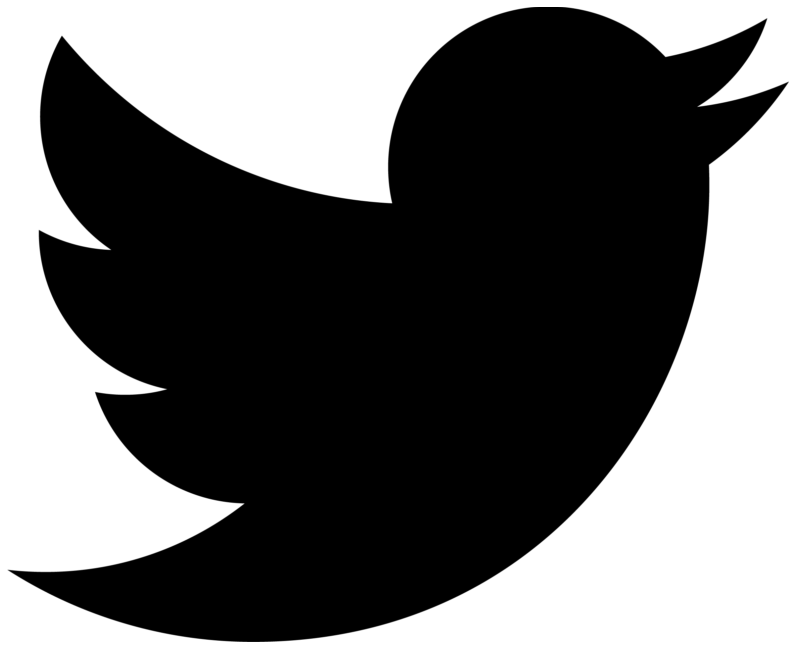

In [15]:
# Import Twitter Logo
image = np.array(Image.open('assets/twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [16]:
# Create function to generate the blue colour for the Word CLoud
import random
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

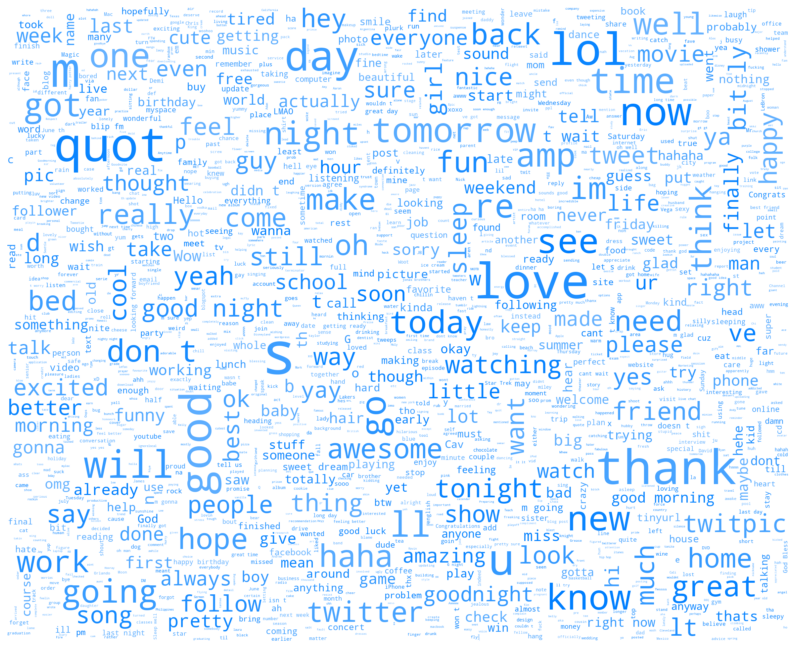

In [18]:
normal_words = ' '.join([text for text in df["tweet_processed"] [df["target"] == 0]])

wordcloud = WordCloud(width = 800, height = 500).generate(normal_words)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

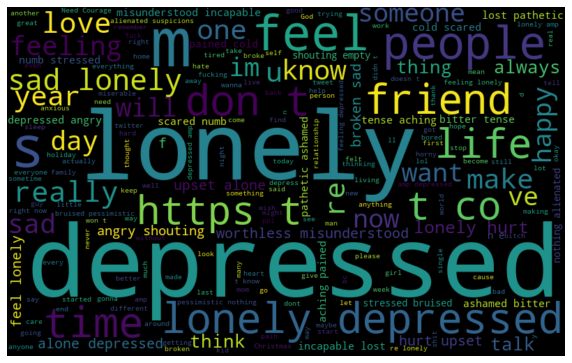

In [13]:
negative_words = ' '.join([text for text in df["tweet_processed"] [df["target"] == 1]])

wordcloud = WordCloud(width = 800, height = 500).generate(negative_words)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [14]:
#split data into test and train 
total = 9638
trainIndex, testIndex = list(), list()
for i in range (df.shape[0]):
    if np.random.uniform(0, 1) < 0.70:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = df.iloc[trainIndex]
testData = df.iloc[testIndex]

In [15]:
trainData["target"].value_counts()

0    3761
1    3041
Name: target, dtype: int64

In [16]:
trainData.head()

,username,tweet,tweet_processed,target
0,Michelle__2011,walking to starbuckss,walking to starbuckss,0
1,Fredgarrett,@gogoguerilla I can't wait too see this,I can t wait too see this,0
2,pizzahoelic_,adyong: shang napansin nako lonely kayka and d...,adyong shang napansin nako lonely kayka and d...,1
3,lightflash12,Llegando de Salsear!! Ma�ana work in my new wo...,Llegando de Salsear Ma ana work in my new wo...,0
4,batutes,"@Pearl Ate, come visit here so you can witness...",Ate come visit here so you can witness a dif...,0


In [17]:
testData["target"].value_counts()

0    1555
1    1281
Name: target, dtype: int64

In [18]:
testData.head()

,username,tweet,tweet_processed,target
5,stonernamu,i’m depressed and lonely. am i gonna solve the...,i m depressed and lonely am i gonna solve the...,1
6,apfauser4,its a wiccan wedding too.. I love this show @...,its a wiccan wedding too I love this show,0
10,breemariee98,Lonely &amp; depressed need a thug in ya life.,Lonely amp depressed need a thug in ya life,1
17,andreabacallado,"It's Amazing what you can hide, Just putting o...",It s Amazing what you can hide Just putting o...,0
18,itsalrght,yo im Lonely and Depressed,yo im Lonely and Depressed,1


In [19]:
def process_message(tweet_processed, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = tweet_processed.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [20]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.df, self.target = trainData['tweet_processed'], trainData['target']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets
        
    def calc_TF_and_IDF(self):
        noOfMessages = self.df.shape[0]
        self.depressive_tweets, self.positive_tweets = self.target.value_counts()[1], self.target.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.df.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.target.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.target.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1
                    
    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets
        
        
        
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, tweet_processed) in enumerate(testData):
            processed_message = process_message(tweet_processed)
            result[i] = int(self.classify(processed_message))
        return result

In [21]:
def metrics(target, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(target)):
        true_pos += int(target.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(target.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(target.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(target.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [22]:
#tf-idf
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['tweet_processed'])
metrics(testData['target'], preds_tf_idf)

Precision:  0.9197080291970803
Recall:  0.8852459016393442
F-score:  0.9021479713603817
Accuracy:  0.9132581100141044


In [34]:
#bagofwords
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['tweet_processed'])
metrics(testData['target'], preds_bow)

Precision:  0.9439461883408071
Recall:  0.6542346542346542
F-score:  0.7728315741165671
Accuracy:  0.8240312833274085


In [36]:
#Predictions with TF-IDF

#depressive tweets 
pm = process_message("Feeling anxious, worried and sad this morning!")
sc_tf_idf.classify(pm)

True

In [37]:
#depressive tweet
pm = process_message("Lonely and sad today")
sc_tf_idf.classify(pm)

True

In [38]:
#depressive tweet
pm = process_message("I am so done with life :(")
sc_tf_idf.classify(pm)

True

In [39]:
#positive tweet
pm = process_message("I am happy today")
sc_tf_idf.classify(pm)

False

In [40]:
#positive tweet 
pm = process_message("Got our new car today.")
sc_tf_idf.classify(pm)

False

In [41]:
#Predictions with Bag-of-Words (BOW)

#depressive tweets
pm = process_message("Depression and anxiety are the worst")
sc_bow.classify(pm)

True

In [42]:
#depressive tweets
pm = process_message("Feeling down..")
sc_bow.classify(pm)

True

In [43]:
#depressive tweets
pm = process_message("i wanna die")
sc_bow.classify(pm)

True

In [44]:
#positive tweets
pm = process_message("Loving how me and my lovely partner is talking about what we want.")
sc_bow.classify(pm)

False

In [45]:
#positive tweets
pm = process_message("Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy")
sc_bow.classify(pm)

False